In [1]:
import pandas as pd
data=pd.read_csv("/content/Student Mental health.csv")
print(data)

               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 

In [2]:
data.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [4]:
data["Age"]=data["Age"].fillna(0)
print(data)

               Timestamp Choose your gender  Age What is your course?  \
0         8/7/2020 12:02             Female    0          Engineering   
1         8/7/2020 12:04               Male    3    Islamic education   
2         8/7/2020 12:05               Male    1                  BIT   
3         8/7/2020 12:06             Female    4                 Laws   
4         8/7/2020 12:13               Male    5         Mathemathics   
..                   ...                ...  ...                  ...   
96   13/07/2020 19:56:49             Female    3                  BCS   
97   13/07/2020 21:21:42               Male    0          Engineering   
98   13/07/2020 21:22:56             Female    1             Nursing    
99   13/07/2020 21:23:57             Female    5     Pendidikan Islam   
100  18/07/2020 20:16:21               Male    2   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 - 3.49      

In [13]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Choose your gender"]=b.fit_transform(data["Choose your gender"])
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")
data["Timestamp"]=b.fit_transform(data["Timestamp"])
data["What is your course?"]=b.fit_transform(data["What is your course?"])
data["Your current year of Study"]=b.fit_transform(data["Your current year of Study"])
data["What is your CGPA?"]=b.fit_transform(data["What is your CGPA?"])
data["Marital status"]=b.fit_transform(data["Marital status"])
data["Do you have Depression?"]=b.fit_transform(data["Do you have Depression?"])
data["Do you have Anxiety?"]=b.fit_transform(data["Do you have Anxiety?"])
data["Do you have Panic attack?"]=b.fit_transform(data["Do you have Panic attack?"])
data["Did you seek any specialist for a treatment?"]=b.fit_transform(data["Did you seek any specialist for a treatment?"])
print(data)

     Timestamp  Choose your gender  Age  What is your course?  \
0            0                   0    0                    17   
1            1                   1    3                    25   
2            2                   1    1                     4   
3            3                   0    4                    33   
4            4                   1    5                    37   
..         ...                 ...  ...                   ...   
96          69                   0    3                     2   
97          69                   1    0                    17   
98          69                   0    1                    38   
99          69                   0    5                    39   
100         69                   1    2                     7   

     Your current year of Study  What is your CGPA?  Marital status  \
0                             3                   3               0   
1                             4                   3               0   
2     

In [14]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain,ytrain)

    Timestamp  Choose your gender  Age  What is your course?  \
31         27                   1    0                     2   
39         33                   0    6                    17   
70         61                   0    6                     7   
24         20                   0    5                     2   
9           9                   1    0                    23   
..        ...                 ...  ...                   ...   
42         35                   0    2                    45   
91         69                   1    0                    30   
25         21                   0    0                     5   
47         40                   0    0                    16   
45         38                   1    0                     2   

    Your current year of Study  What is your CGPA?  Marital status  \
31                           4                   3               0   
39                           1                   2               1   
70                   

In [17]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)
print(ypred)

[0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
c=br.predict([[70,0,23,0,1,0,0,1,1,0]])
print(c)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

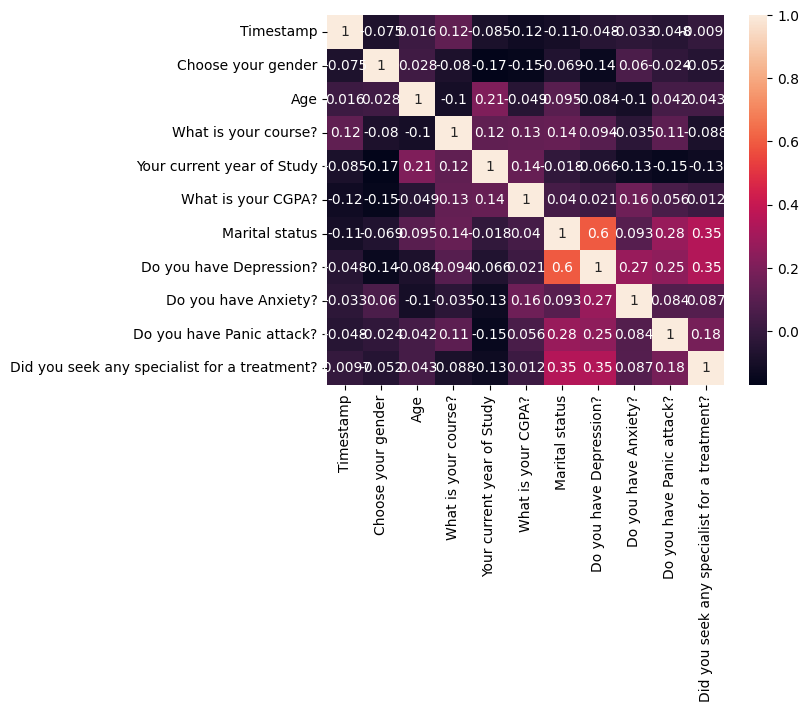

In [21]:
import seaborn as sns
data=data.corr()
sns.heatmap(data=data,annot=True)

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[2 0]
 [1 0]]


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.6666666666666666


In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
